# Decision Tree Lab

In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn import tree

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [3]:
# Import the data from iris.arff
Data_Set = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(Data_Set[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')
Data_Set_np = iris_df.to_numpy()

# Separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
X = X.astype(float)
y = Data_Set_np[:, -1]

clf = DecisionTreeClassifier().fit(X, y)
print(clf.score(X, y))

1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [4]:
# Evaluation
clf = DecisionTreeClassifier(max_depth = 3).fit(X, y)
print(clf.score(X, y))

0.9733333333333334


I imported the iris data set and ran the Decision Tree classifier on it. As expected, the accuracy of the entire training set was 100%. This is likely because the data set is small and easy to separate. However, when I set the max_depth parameter to 3, the model only had a 97.3% accuracy. This also makes sense since the new algorithm was forced to stopping splitting 3 features in on each side of the tree. So, the last 2.7% of the misclassified data could not be separated into deepr nodes. This likely prevents overfit. But, it may make the model less accurate at generalizing.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [22]:
Data_Set = arff.loadarff("voting_with_missing.arff")
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()

#separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
# convert bytes with "yes" to 1, and bytes with "no" to 0
X[X == b'y'] = 1
X[X == b'n'] = 0
# convert bytes with "republican" to 1, and bytes with "democratic" to 0
y[y == b'republican'] = 1
y[y == b'democrat'] = 0

# One hot encode input to account for the missing values
X = pd.DataFrame(X)
X = pd.get_dummies(X)
X = X.to_numpy()

X = X.astype(float)
y = y.astype(float)

#randomly split the data into test and training (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf_voting = DecisionTreeClassifier().fit(X_train, y_train)

# Learn Voting with missing values.
print("Training Accuracy", clf_voting.score(X_train, y_train))
print("Test Accuracy", clf_voting.score(X_test, y_test))

# For later use
X_vote = X
y_vote = y

Training Accuracy 1.0
Test Accuracy 0.9425287356321839


Discussion including explaining how the missing values were handled by your model:

First, as usual, I imported the data and separated it into the input matrix and output vector. Also, I manually converted a few of the binary feautures into real numbers. Unfortunately, since some of the data entries of the input were missing, more processing was needed to use the data. So, I used Panda's get_dummies() function to one-hot encode the data. This made the missing data entries features themeselves. So, at some point in the algorithm, the decision tree likely split between entries that had those data entries and ones that did not. This process resulted in a 100% training accuracy and 97.7% testing accuracy. So, the model was quite effective.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [21]:
Data_Set = arff.loadarff("cars.arff")
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()

#separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# convert bytes with "yes" to 1, and bytes with "no" to 0
X[X == b'v-high'] = 3
X[X == b'high'] = 2
X[X == b'med'] = 1
X[X == b'low'] = 0
X[X == b'small'] = 0
X[X == b'big'] = 2

X = pd.DataFrame(X)
X = pd.get_dummies(X)
# convert target data from nomial to real
y[y == b'unacc'] = 0
y[y == b'acc'] = 1
y[y == b'good'] = 2
y[y == b'vgood'] = 3

X = X.astype(float)
y = y.astype(float)

# Set up fot the table
table_data = [["N-Fold", "Validation Accuracy"]]
scores = []
total_score = 0
i = 1

# Run the model and save the scores
clf_cars = DecisionTreeClassifier().fit(X, y)
the_scores = cross_val_score(clf_cars, X, y, cv=10)

# Save data in correct format
for score in the_scores:
    table_data.append([i, score])
    i += 1
    total_score += score
table = tabulate(table_data, headers="firstrow")
print(table)
print("Average Predicted Accuracy: ", total_score / 10)
print()

# Same process but with N=5
table_data = [["N-Fold", "Validation Accuracy"]]
scores = []
total_score = 0
i = 1
clf_cars = DecisionTreeClassifier().fit(X, y)
the_scores = cross_val_score(clf_cars, X, y, cv=5)
for score in the_scores:
    table_data.append([i, score])
    i += 1
    total_score += score
table = tabulate(table_data, headers="firstrow")
print(table)
print("Average Predicted Accuracy: ", total_score / 5)
print()

<ipython-input-21-8f84ce979c4d>:18: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
<ipython-input-21-8f84ce979c4d>:18: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)


  N-Fold    Validation Accuracy
--------  ---------------------
       1               0.757225
       2               0.791908
       3               0.936416
       4               0.676301
       5               0.861272
       6               0.913295
       7               0.895954
       8               0.861272
       9               0.912791
      10               0.918605
Average Predicted Accuracy:  0.852503696733432

  N-Fold    Validation Accuracy
--------  ---------------------
       1               0.731214
       2               0.731214
       3               0.748555
       4               0.753623
       5               0.805797
Average Predicted Accuracy:  0.754080589762922



Discussion

Now, using the car dataset, I followed a similar process as above to one-hot encode the input matrix in the decision tree. Also, I used values like 0, 1, 2, and 3 for attributes like low, medium, high, and very high. Then, rather than using a standard test/traning split, I used the N-fold cross validation set method (first with N=10 and then with N=5). This partitioned the data into 10 subsets. Then, it trained the model on 9 of the sets, using the other to calculate the testing accuracy. Then, it repeated the process until each subset has been used as a test set. This process is often used when there is not enough data to effectively split everything into a standard testing and training set.

On this specific example, for the 10-fold cross validation, the average accuracy was 85% (with it ranging from 75-93% on each fold). I was surprised see how inaccurate the model was. The data may have been difficult to separate. Furthermore, the the 5-fold cross validation, the average accuracy was around 75% (with it ranging from 70-80% on each fold). I was not surprised to see this since the 5-fold data uses less data on each training set and more in each test set. But, it may be a more accurate prediction of how accurate the model truly would be at generalizing novel data.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

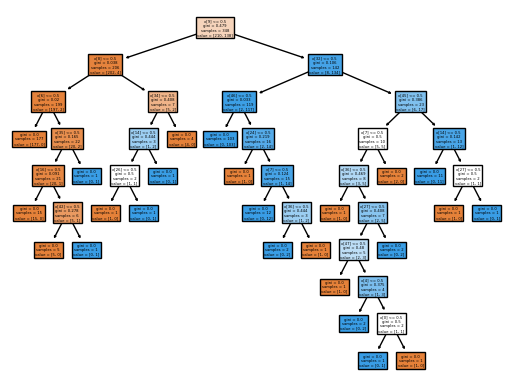

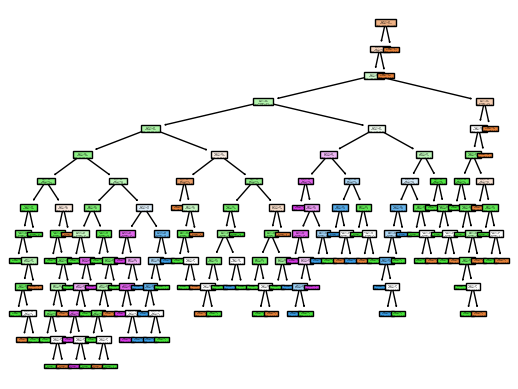

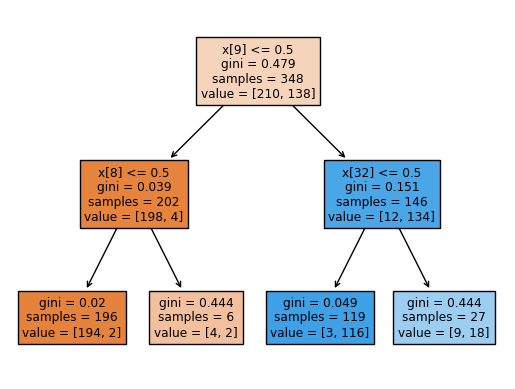

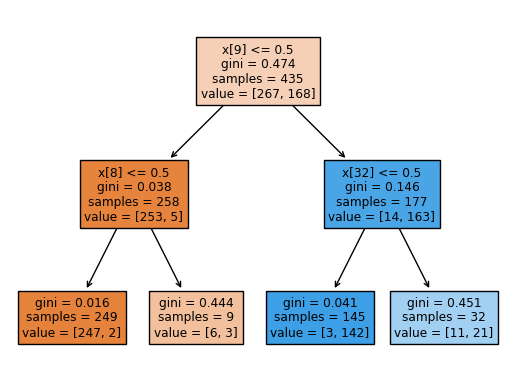

In [23]:
#Print induced trees for the voting and car data sets
tree.plot_tree(clf_voting, filled=True)
plt.show()
tree.plot_tree(clf_cars, filled=True)
plt.show()

# Print the trees with max_depth set to 2
X_train, X_test, y_train, y_test = train_test_split(X_vote, y_vote, test_size=0.20)
clf_voting2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree.plot_tree(clf_voting2, filled=True)
plt.show()

clf_cars2 = DecisionTreeClassifier(max_depth=2).fit(X, y)
tree.plot_tree(clf_cars2, filled=True)
plt.show()

Discuss what the Trees have learned on the 2 data sets

First, I printed the Decision Trees that each model created without a maximum depth. These trees were very large and quite difficult to understand for that reason. The car decision tree was especially large. So, in order to understand the trees better, I set the "filled" to true. This gave each class a specific color. Also, I printed the trees out with a max depth parameter set to 2. This made each tree much smaller, only showing what each tree deems to be the most important parameters. Although this method greatly reduces accuracy, it improves intelligibility.

After doing this, I was able to determine that the first attribute split each tree chose was quite effective. For the voting data set, most of the class that was represented as orange was on the left side and blue on the right. Of the 202 samples on the left, 198 belonged to the orange class. And, on the right side, of the 146 samples, 134 belonged to the blue class.

Additionally, for the car data set, most of the data labeled orange was on the left as well. Of the 258 samples on the left, 253 belonged to the orange class. And, on the right side, of the 177 samples, 163 belonged to the blue class.

I was surprised to see how effective the smaller trees were at seperating data. You really do not need that many splits to make generalization accurate. However, the data was not as intelligble as I would have liked (because of the one-hot encoding we used). A lot of further analysis would be needed to determine what attributes are the ones used in the splits.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [54]:
# Experiment with criterion parameter
table_data = [["Split Criteria", "Training Accuracy", "Test Accuracy", "Depth"]]
split_criterion = ["gini", "entropy", "log_loss"]
for criteria in split_criterion:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    clf_cars = DecisionTreeClassifier(criterion=criteria).fit(X_train, y_train)
    table_data.append([criteria, clf_cars.score(X_train, y_train),
                       clf_cars.score(X_test, y_test), clf_cars.get_depth()])


table = tabulate(table_data, headers="firstrow")
print(table)

Split Criteria      Training Accuracy    Test Accuracy    Depth
----------------  -------------------  ---------------  -------
gini                                1         0.862069        6
entropy                             1         0.977011        7
log_loss                            1         0.931034       10


Discuss criterion effects

This time, I changed the hyperparemeters that define the split criterion of the decision tree. To my surprise, each of the split criterion yielded similar results. They all had training accuracies at 100% and test accuracies around 93%. Also, each of them had similar tree depths (around 9). I ran my code over and over again to try to find a noticeable difference. But, I think that the differences resulted more from random error rather than the true effectiveness of each function.

So, in conclusion, since each function is based on a smiliar idea of maximizing the gain of information with each split, the minor differences of implementation do not have much effect on the overall accuracy of the Decision Tree.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [59]:
# Explore different overfit parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("----------Fully Induced Tree----------")
clf_cars = DecisionTreeClassifier().fit(X_train, y_train)
print("Training Set Accuracy: ", clf_cars.score(X_train, y_train))
print("Test Set Accuracy: ", clf_cars.score(X_test, y_test))
print("Total Number of Nodes: ", clf_cars.tree_.node_count)
print("Maximum Tree Depth: ", clf_cars.tree_.max_depth)
print()

# Min Samples Leaf
print("----------min_samples_leaf----------")
table_data = [["min_sample_leaf", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
min_sample_leafs = [1, 2, 3, 5, 10, 50, 100, 1000]
for sample in min_sample_leafs:
    clf_cars = DecisionTreeClassifier(min_samples_leaf = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

# Repeat Process for other attributes
print("----------min_samples_split----------")
table_data = [["min_sample_split", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
min_sample_splits = [2, 3, 5, 10, 50, 100, 1000]
for sample in min_sample_splits:
    clf_cars = DecisionTreeClassifier(min_samples_split = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

print("----------min_impurity_decrease----------")
table_data = [["min_impurity_decrease", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
min_impurity_decreases = [0, 0.0001, 0.001, 0.01, 0.1, 1]
for sample in min_impurity_decreases:
    clf_cars = DecisionTreeClassifier(min_impurity_decrease = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

print("----------max_depth----------")
table_data = [["max_depth", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
max_depths = [1, 2, 3, 4, 5, 8, 10, 15, 20]
for sample in max_depths:
    clf_cars = DecisionTreeClassifier(max_depth = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

print("----------max_leaf_nodes----------")
table_data = [["max_leaf_nodes", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
max_leaf_nodes = [2, 3, 4, 8, 10, 20, 30, 50, 100, 200, 500]
for sample in max_leaf_nodes:
    clf_cars = DecisionTreeClassifier(max_leaf_nodes = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

print("----------max_features----------")
table_data = [["max_features", "Training Set Accuracy", "Test Set Accuracy",
              "Total Number of Nodes", "Maximum Tree Depth"]]
max_features = [2, 3, 4, 8, 10, 20, 30, 50, 100, 200, 500]
for sample in max_features:
    clf_cars = DecisionTreeClassifier(max_features = sample).fit(X_train, y_train)
    table_data.append([sample, clf_cars.score(X_train, y_train),
                      clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                      clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)
print()

----------Fully Induced Tree----------
Training Set Accuracy:  1.0
Test Set Accuracy:  0.9195402298850575
Total Number of Nodes:  53
Maximum Tree Depth:  9

----------min_samples_leaf----------
  min_sample_leaf    Training Set Accuracy    Test Set Accuracy    Total Number of Nodes    Maximum Tree Depth
-----------------  -----------------------  -------------------  -----------------------  --------------------
                1                 1                    0.931034                       53                     9
                2                 0.974138             0.931034                       43                     8
                3                 0.971264             0.91954                        33                     6
                5                 0.962644             0.931034                       23                     5
               10                 0.962644             0.931034                       17                     4
               50            

Discussion

For this experiment, I attempted to determine the benefits of different methods used to avoid overfit. The original model keeps on splitting the data until all (or the maximum possible number of) leaf nodes are a specific class. For the car data set, this occured with 53 nodes and a maximum depth of 9. The training accuracy was 100%, as expected. But, the testing accuracy was only 91.9%. This means that the model likely overfit the training set.

First, I played with the min_samples_leaf parameter. This parameter sets the minimum number of samples needed to be in each leaf node. As this parameter increased, the training accuracy and number of nodes decreased, but the test accuracy actually increased. The maximum testing accuracy was 96% when the tree set the min_samples_leaf parameter to 50-100. Likewise, for the min_samples_split paremeter, we yielded similar results. This parameter is similar, but sets a minimum number of samples for each split, rather than just at the leaf nodes.

Third, I adjusted the min_impurity_decrease parameter. This prevents the model from splitting the data when the impurity is small. So, it only splits when it is really worth it. The default value is 0, meaning that the data always plits. I tested values from 0.0001 to 1. The one with the best testing accuracy was 0.1, using only 3 nodes to split the data.

Fourth, I adjusted the max_depth argument. This set limits the depth of the decision tree. To my surprise, the most accurate model had a maximum depth of 1, using only 3 nodes. Likewise, for the max_leaf_nodes parameter, the model was the most acurrate when it only had 2 lead nodes. And, for the max_features parameter, the test accuracy was 95% when only 3 features were used. These numbers greatly surprised me. I think that they mean that our model is not very accurate beyond the first few nodes. All the work used to separate the training data really is not worth it. This means that our original model really did overfit the data. Significant improvement can be made if changes are made to avoid overfit.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [62]:
# Pruning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("----------Fully Induced Tree----------")
clf_cars = DecisionTreeClassifier().fit(X_train, y_train)
print("Training Set Accuracy: ", clf_cars.score(X_train, y_train))
print("Test Set Accuracy: ", clf_cars.score(X_test, y_test))
print("Total Number of Nodes: ", clf_cars.tree_.node_count)
print("Maximum Tree Depth: ", clf_cars.tree_.max_depth)
print()

# RUn the model multiple times on different pruning values
table_data = [["Pruning ccp_alpha", "Training Accuracy", "Test Accuracy", "Total Number of Nodes", "Maximum Tree Depth"]]
ccp_alphas = [0, 0.001, 0.005, 0.01, 0.2, 0.3, 0.5, 1]
for ccp_alpha in ccp_alphas:
    clf_cars = DecisionTreeClassifier(ccp_alpha=ccp_alpha).fit(X_train, y_train)
    table_data.append([ccp_alpha, clf_cars.score(X_train, y_train),
                       clf_cars.score(X_test, y_test), clf_cars.tree_.node_count,
                       clf_cars.tree_.max_depth])
table = tabulate(table_data, headers="firstrow")
print(table)

----------Fully Induced Tree----------
Training Set Accuracy:  1.0
Test Set Accuracy:  0.9425287356321839
Total Number of Nodes:  49
Maximum Tree Depth:  8

  Pruning ccp_alpha    Training Accuracy    Test Accuracy    Total Number of Nodes    Maximum Tree Depth
-------------------  -------------------  ---------------  -----------------------  --------------------
              0                 1                0.942529                       47                     8
              0.001             1                0.931034                       49                     8
              0.005             0.974138         0.965517                       13                     4
              0.01              0.954023         0.965517                        5                     2
              0.2               0.954023         0.965517                        3                     1
              0.3               0.954023         0.965517                        3                     1
   

Discussion

This time, to help reduce the risk of overfitting, I made changes to the ccp_alpha value. This paremeter is used to prune the Decision Tree. Smaller values mean that less pruning is done. Pruning is a techinque used to decrease the complexity of a decision tree. After the entire tree is made, subtrees are created with less nodes. And, the one with the best accuracy is used to replace the original tree.

On the car data set, the training accuracy decreased as the ccp_alpha parameter increased. But, the test accuracy improved from 94% to 96.5% (with a maximum value at 0.2). This means that the original tree likely overfit the data. So, pruning actually improves the accuracy of generalization. Also, the number of nodes decreased from 47 to 3 and the maximum tree depth decreased from 8 to 1. This makes sense since the whol purpose of pruning is to decrease the number of nodes needed in a Decision Tree.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [133]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = []
with open("parkinsons.data", "r") as file:
    data_set = file.read().splitlines()

#separate each line into a list and append to data
for line in data_set:
    data.append(line.split(","))

#convert the data into an array
Data_Set_df = pd.DataFrame(data)
data = Data_Set_df.to_numpy()

# Separate input from output
X = data[1:, 1:16]  # Don't need the names
y = data[1:, 17]

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeRegressor().fit(X_train, y_train)

# Model statistics
print("Number of Nodes:", clf.tree_.node_count)
print("Number of Leaf Nodes:", clf.get_n_leaves())
print("Max Depth:", clf.get_depth())
print()
print("Training MAE", mean_absolute_error(clf.predict(X_train), y_train))
print("Testing MAE", mean_absolute_error(clf.predict(X_test), y_test))
print()
print("DT Training Regressor Score", clf.score(X_train, y_train))
print("DT Testing Regressor Score", clf.score(X_test, y_test))

Number of Nodes: 33
Number of Leaf Nodes: 17
Max Depth: 6

Training MAE 0.0
Testing MAE 0.05128205128205128

DT Training Regressor Score 1.0
DT Testing Regressor Score 0.7467532467532467


Discussion

For this problem, I used a data set from UC Irvine that is used to predict whether someone has Parkinson's disease (https://archive.ics.uci.edu/dataset/174/parkinsons). It bases the results on mathematical data of the person's voice. I used regression to predict the probability that a certain person has the disease.

Using an 80% training set split, the model converged with 33 nodes, 17 of which were leaf nodes. The maximum depth of the tree was 6. It's training mean average error was 0 with a regressor score of 1.0. This means that the model was practically perfect on the training set. But, the testing mean average error was 0.05 with a regressor score of 0.747. This is still much more accurate than the baseline accuracy. But, it definitely is not perfect. The model likely overfit the data because it did not stop until each leaf node was 100% accurate.

Overall, I was surprised to see how well the model performed on the data set. This would be an effective method to help doctors determine if a patient has Parkinson's disease.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [155]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, X, counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """
        # Find the counts of each feature
        counts = np.zeros(len(X[0]))
        i = 0
        for column in X.T:
            items = set()
            print(column)
            for row in column:
                if row not in items:
                    items.add(row)
                    print(row)
                    counts[i] += 1
            i += 1

        # Store attributes
        self.X = X
        self.counts = counts

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        return 0

In [154]:
# Optional Debugging Dataset - Pizza Homework
pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
pizza_labels = np.array([2,0,1,2,1,2,1,1,0])

DTClassifier(pizza_dataset)

[1 0 0 1 1 1 0 1 0]
1
0
[2. 0. 0.]
[2 0 1 1 0 0 2 0 2]
2
0
1
[2. 3. 0.]
[0 0 1 1 0 1 1 0 0]
0
1
[2. 3. 2.]
[2. 3. 2.]


DTClassifier(X=array([[1, 2, 0],
       [0, 0, 0],
       [0, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [0, 2, 1],
       [1, 0, 0],
       [0, 2, 0]]),
             counts=array([2., 3., 2.]))